# Sensitivity Analysis on the Strength Profiles

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
#Connect Plaxis and Jupyter Notebook
import imp
# plaxis_path = r'C:\Program Files (x86)\Plaxis\PLAXIS 2D v2016'
plaxis_path =r'C:\Program Files\Plaxis\PLAXIS 2D'
found_module = imp.find_module('plxscripting', [plaxis_path])
plxscripting = imp.load_module('plxscripting', *found_module)
from plxscripting.easy import *
port_in = 10000
s_i, g_i = new_server('localhost', port_in)   # define input server port

port_out = 10001
s_o, g_o = new_server('localhost', port_out)   # define output server port

In [31]:
g_i.gotostructures()
result = g_i.line(-30,-4.5,-30,-22.5)
L2 = g_i.line(-30,)

In [46]:
l2 = g_i.line(-30,-11,0,-11)

In [47]:
g_i.gotomesh()

'OK'

In [50]:
g_i.mesh(0.06)

PlxScriptingError: Unsuccessful command:
Meshing failed with the following error:
Mesh output file not found

In [ ]:
soil_mat = g_i.MDDR_FC_Per55155z_c #the target material

In [86]:
#before we run any sensitivity analysis, let's keep a records of the original data before we do the sensitivity
original_soil_pro = {}
original_soil_pro['cref'] = soil_mat.cref.value
original_soil_pro['cinc'] = soil_mat.cinc.value
original_soil_pro['yref'] = soil_mat.verticalref.value

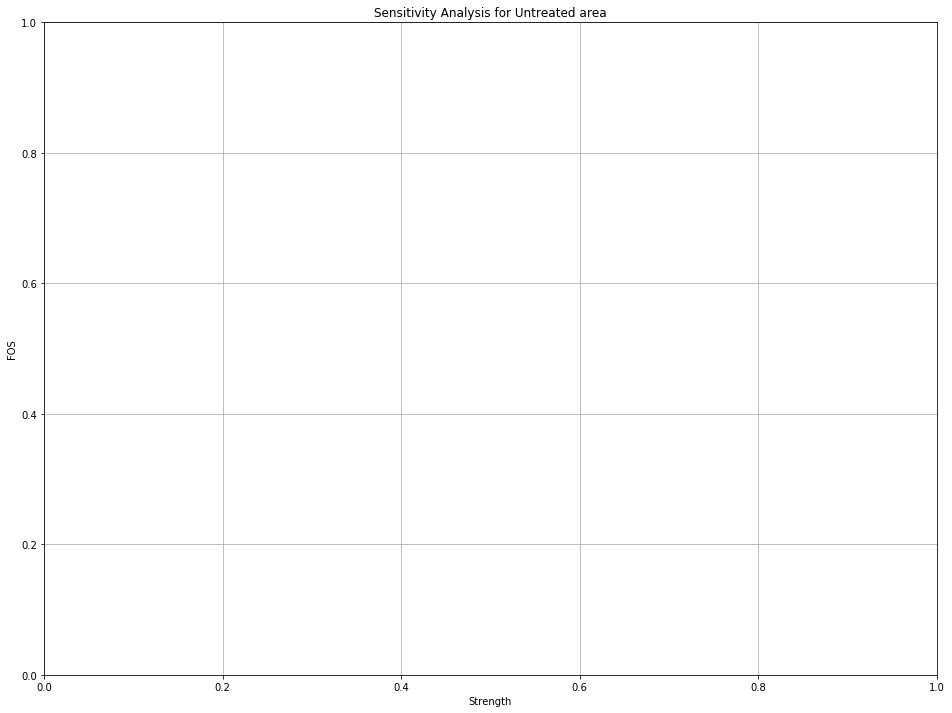

In [94]:
fig = plt.figure(figsize =(16, 12))
ax = fig.add_subplot(111)
ax.set_title('Sensitivity Analysis for Untreated area')
ax.set_xlabel('Strength')
ax.set_ylabel('FOS')
ax.grid()

In [99]:
# define a 2-d array that holds the data 
FOS = []
for attempt in [4.0,4.5,5.0,5.5,6.0,6.5]:
    soil_mat.cref=attempt
    soil_mat.E = attempt* 42.0
    g_i.gotostages()
    g_i.Phase_11.ShouldCalculate =True
    g_i.Phase_16.ShouldCalculate =True
    g_i.calculate()
    port = g_i.view(g_i.Phase_16)
    s_o, g_o = new_server('localhost', port)
    FOS.append([attempt,g_o.Phase_16.Info.SumMsf.value])
    print('cref = {} - FOS = {}'.format(attempt,g_o.Phase_16.Info.SumMsf.value))


cref = 4.0 - FOS = 1.3149619485626
cref = 4.5 - FOS = 1.31921692327736
cref = 5.0 - FOS = 1.32590986246314
cref = 5.5 - FOS = 1.32504825836007
cref = 6.0 - FOS = 1.33120189342919
cref = 6.5 - FOS = 1.33428023599463


In [102]:
FOS = np.array(FOS)

In [118]:
ax.scatter(FOS[:,0],FOS[:,1])
ax.set_xlabel('$c_{varies}$ +1.55z(z=0 at -4.5mPD)') 
ax.set_xlim([3,8])
ax.set_ylim([1.1,1.5])
ax.set_title('Sensitivity Analysis for Untreated area - CH1150')
fig.savefig('sensitivity_untreated.pdf')

In [119]:
%pwd

'C:\\Users\\dazhong.li\\OneDrive\\05Research\\codes\\01Python\\pythonlib\\plaxisremote\\jupyternotebooks'